In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
from matplotlib.patches import Polygon

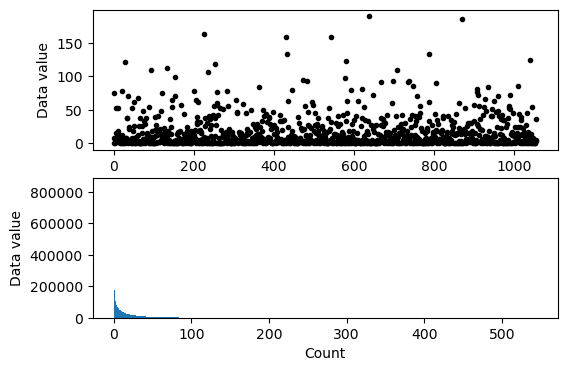

In [24]:
popN = int(1e7)

population = (4*np.random.randn(popN))**2

popMean = np.mean(population)

fig,ax = plt.subplots(2,1,figsize=(6,4))

ax[0].plot(population[::9475],'k.')
ax[0].set_xlabel('Data index')
ax[0].set_ylabel('Data value')

ax[1].hist(population,bins='fd')
ax[1].set_xlabel('Count')
ax[1].set_ylabel('Data value')

plt.show()

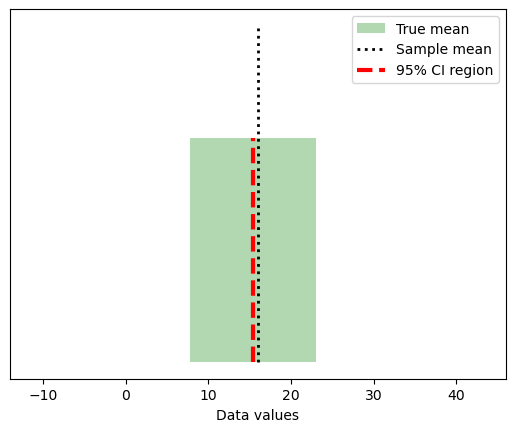

In [25]:
samplesize = 40
confidence = 95

randSamples = np.random.randint(0,popN,samplesize)
samplemean = np.mean(population[randSamples])
samplestd = np.std(population[randSamples],ddof=1)

citmp = (1-confidence/100)/2
confint = samplemean + stats.t.ppf([citmp,1-citmp],samplesize-1) * samplestd/np.sqrt(samplesize)

fig,ax = plt.subplots(1,1)

y = np.array([ [confint[0],0],[confint[1],0],[confint[1],1],[confint[0],1] ])
p = Polygon(y,facecolor='g',alpha=.3)
ax.add_patch(p)

ax.plot([popMean,popMean],[0,1.5],'k:',linewidth=2)
ax.plot([samplemean,samplemean],[0,1],'r--',linewidth=3)
ax.set_xlim([popMean-30,popMean+30])
ax.set_yticks([])
ax.set_xlabel('Data values')
ax.legend(('True mean','Sample mean','%g%% CI region'%confidence))
plt.show()

In [28]:
samplesize = 50
confinence = 95
numExperiments = 5000

withinCI = np.zeros(numExperiments)

citmp = (1-confidence/100)/2
CI_T = stats.t.ppf([citmp, 1-citmp],samplesize-1)
sqrtN = np.sqrt(samplesize)

for expi in range(numExperiments):
    
    randSamples = np.random.randint(0,popN,samplesize)
    samplemean = np.mean(population[randSamples])
    samplestd = np.std(population[randSamples],ddof=1)
    confint = samplemean + CI_T * samplestd/sqrtN
    
    if popMean>confint[0] and popMean<confint[1]:
        withinCI[expi] = 1
    
print('%g%% of sample C.I. ''s contained the true population mean.' %(100*np.mean(withinCI)))

92.42% of sample C.I. s contained the true population mean.
